<a href="https://colab.research.google.com/github/blackfox2001/bmstu/blob/master/tmo2022/nirs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## НИР. Яровенко Максим, ИУ5Ц-82Б

## Задание

1.   Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2.   Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.




## Выбор и загрузка данных

Возьмем датасет по ссылке: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

В нем по нескольким параметрам предсказывается риск инсульта.

1. Age - возраст пациента;
2. Sex - пол пациента;
3. exang - стенокардия, вызванная физической нагрузкой (1 - да, 0 - нет);
4. ca - количество крупных судов (0-3);
5. cp - тип боли в груди (1 - типичная стенокардия, 2 - атипичная стенокардия, 3 - неангинозная боль, 4 - бессимптомный);
6. trtbps - артериальное давление в покое (в мм. рт. ст.);
7. chol - холестерин в мг/дл, полученный с помощью датчика ИМТ;
8. fbs - уровень сахара в крови > 120 мг/дл (1 - да, 0 - нет);
9. rest_ecg - результаты электрокардиографии в покое (0 - нормальные, 1 - наличие аномалии зубца st-t, 2 - показания вероятной или определенной гипертрофию левого желудочка по критериям Эстеса);
10. thalach - 
достигнута максимальная частота сердечных сокращений;
11. target (0 - малый риск инсульта, 1 - высокий риск инсульта).

Импортируем библиотеки с помощью команды import.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from google.colab import files
%matplotlib inline 
sns.set(style="ticks")

ModuleNotFoundError: No module named 'google'

Загружаем данные

In [ ]:
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,0,1,178,0,0,2,

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data = data.drop_duplicates()

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Первые 5 строк датасета:

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Столбцы:

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Определим размер датасета:

In [ ]:
data.shape

(302, 14)

Определим типы данных:

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Проверим наличие пропусков в данных:

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Вывод. Представленный набор данных не содержит пропусков.

## Построение графиков для понимания структуры данных

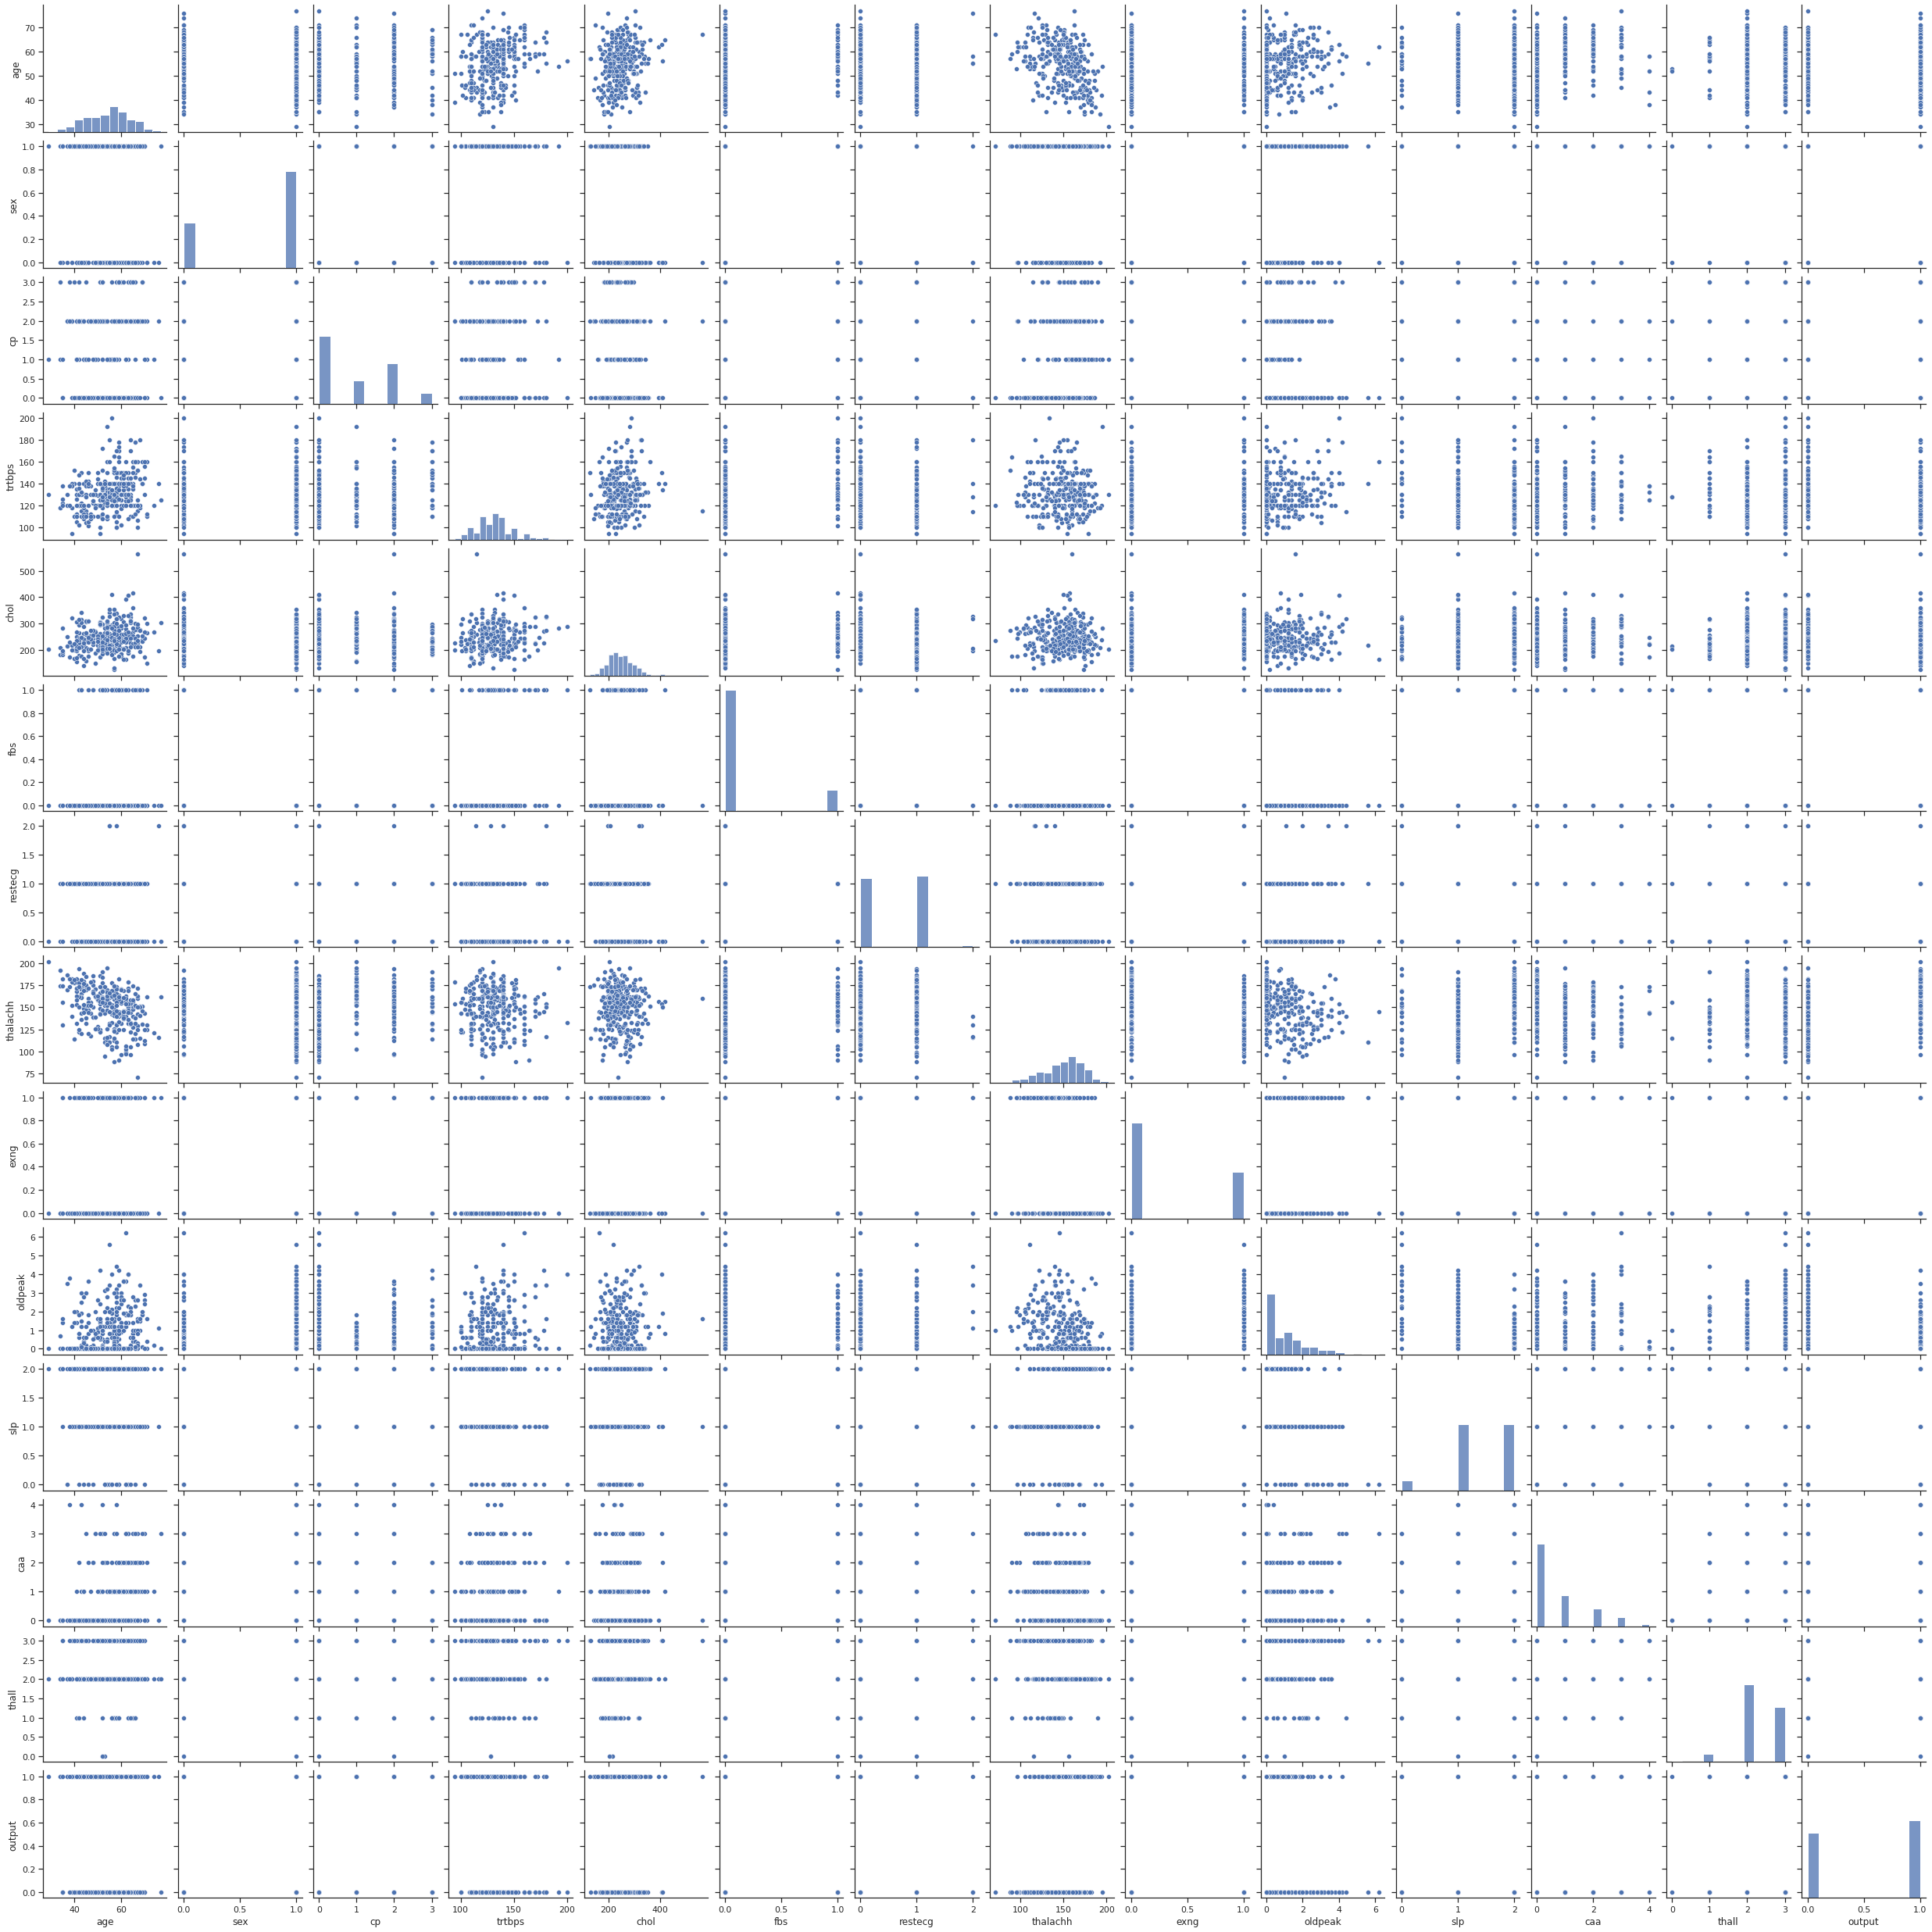

In [ ]:
sns.pairplot(data)

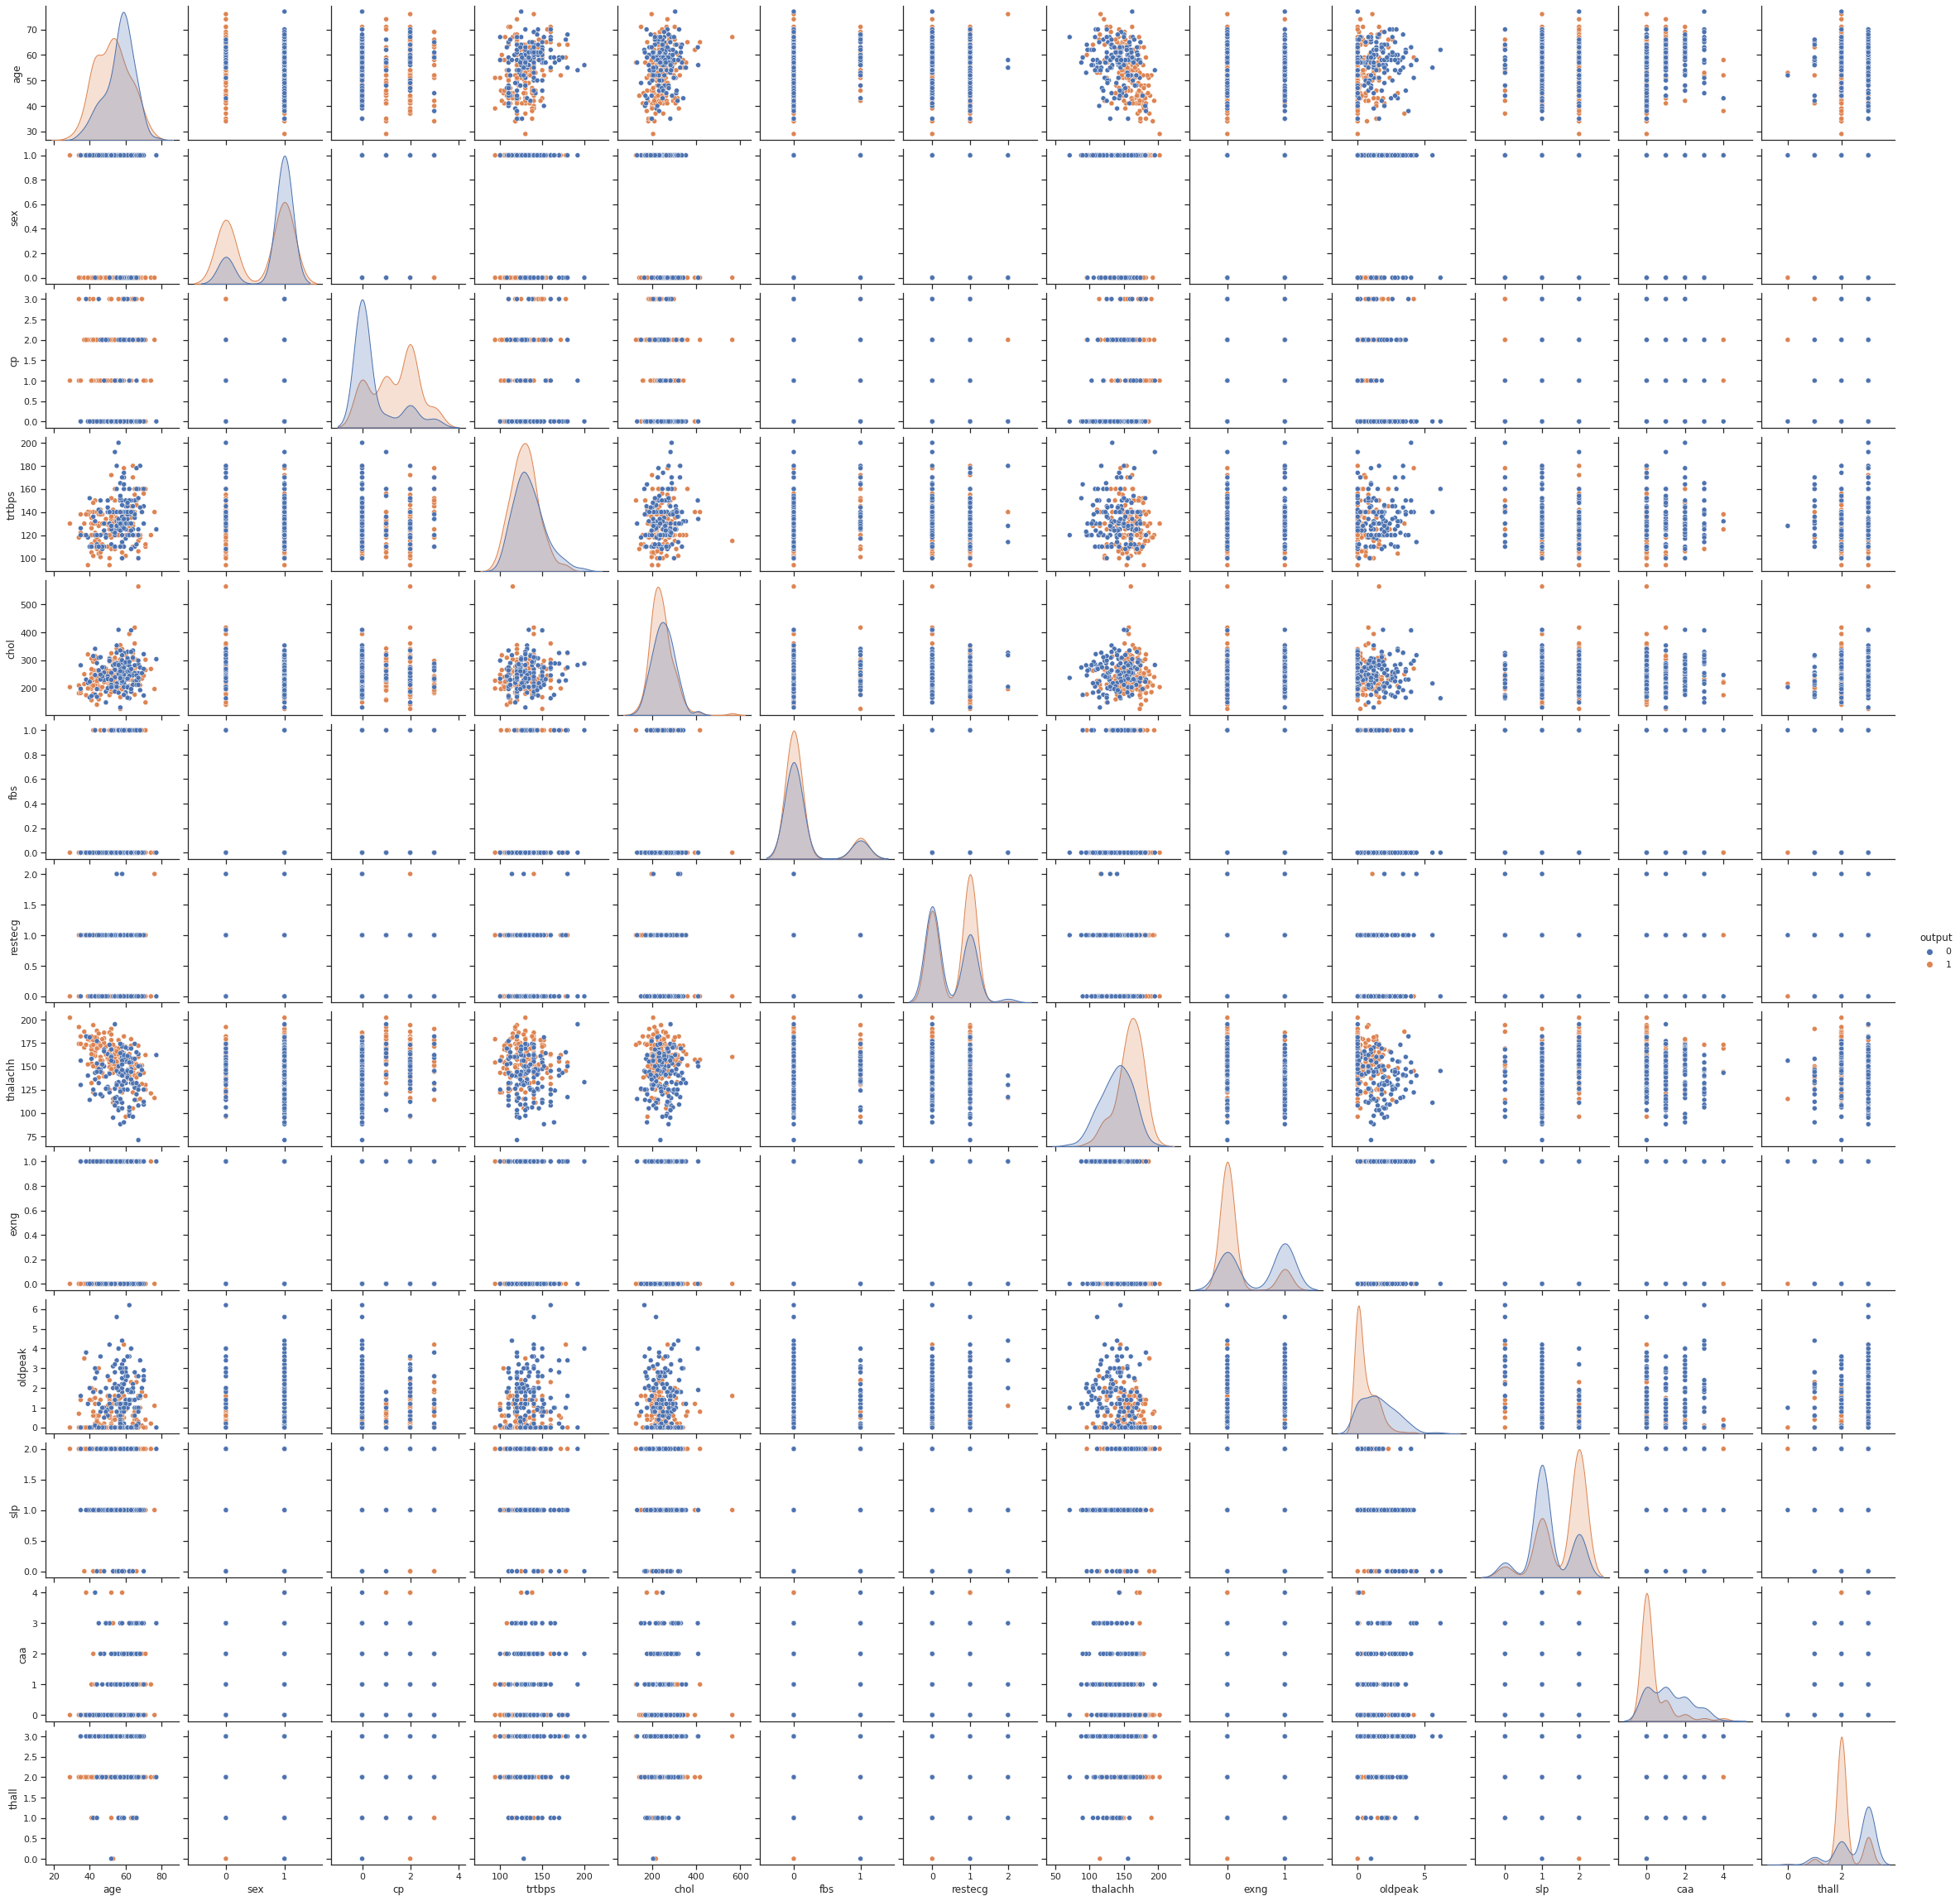

In [ ]:
sns.pairplot(data, hue="output")

In [ ]:
data['output'].unique()

array([1, 0])

Выяснилось, что в целевом признаке 2 уникальных значения.

Оценим дисбаланс классов

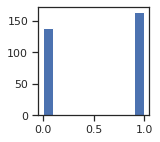

In [ ]:
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['output'])
plt.show()

In [ ]:
data['output'].value_counts()

1    164
0    138
Name: output, dtype: int64

Вывод. Дисбаланс классов приемлемый.

Скрипичные диаграммы для числовых колонок:

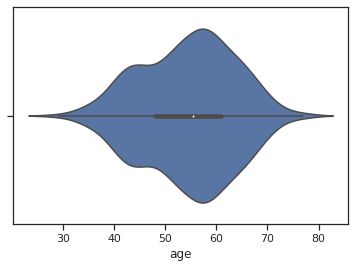

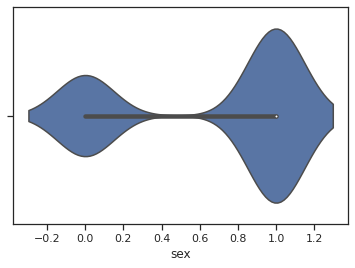

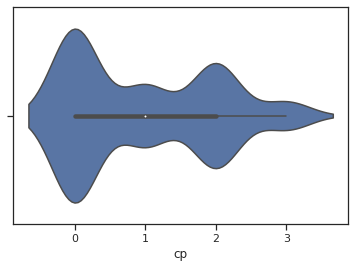

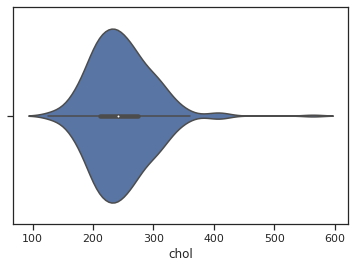

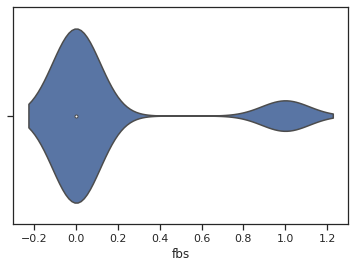

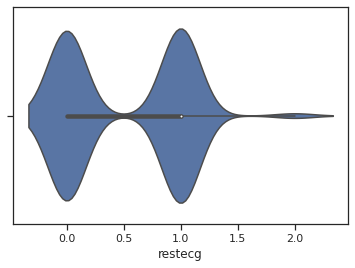

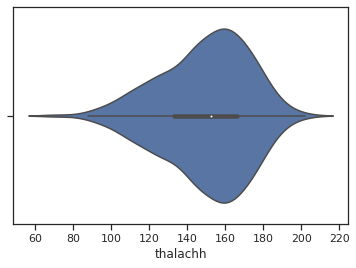

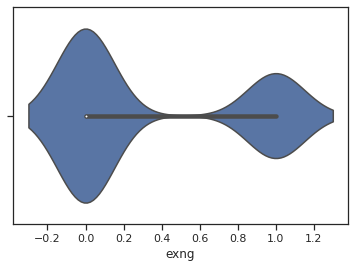

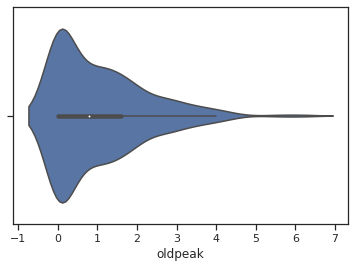

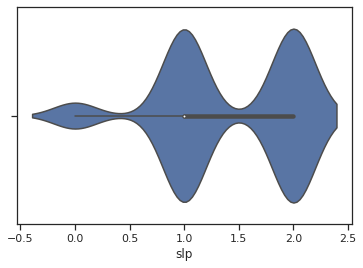

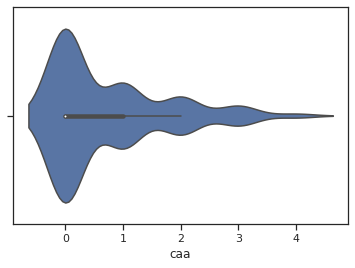

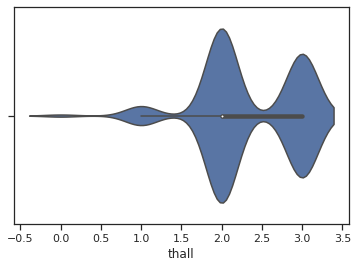

In [ ]:
for col in ['age', 'sex', 'cp', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']:
    sns.violinplot(x=data[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

Категориальные признаки отсутствуют, их кодирования не требуется. Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Выполним масштабирование данных.

Числовые колонки для масштабирования:

In [ ]:
scale_cols = ['age', 'sex', 'cp', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

Добавим масштабированные данные в набор данных:

In [ ]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,...,cp_scaled,chol_scaled,fbs_scaled,restecg_scaled,thalachh_scaled,exng_scaled,oldpeak_scaled,slp_scaled,caa_scaled,thall_scaled
0,63,1,3,145,233,1,0,150,0,2.3,...,1.000000,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,37,1,2,130,250,0,1,187,0,3.5,...,0.666667,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,41,0,1,130,204,0,0,172,0,1.4,...,0.333333,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,56,1,1,120,236,0,1,178,0,0.8,...,0.333333,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,57,0,0,120,354,0,1,163,1,0.6,...,0.000000,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


Проверим, что масштабирование не повлияло на распределение данных

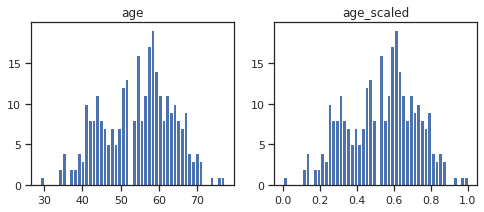

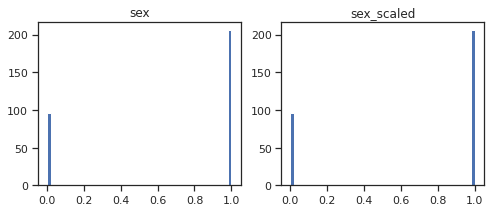

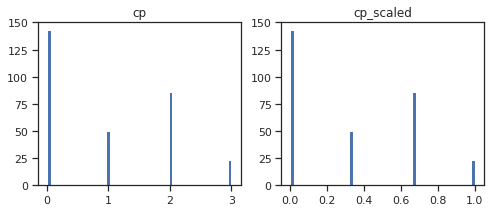

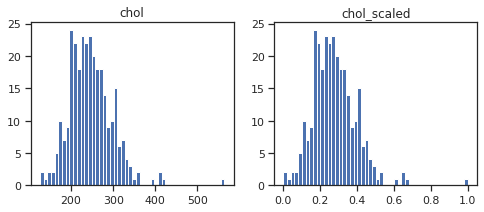

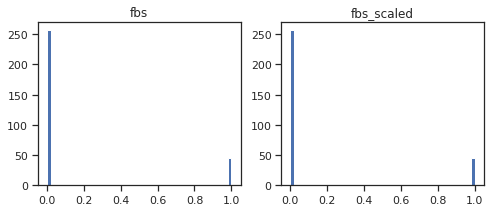

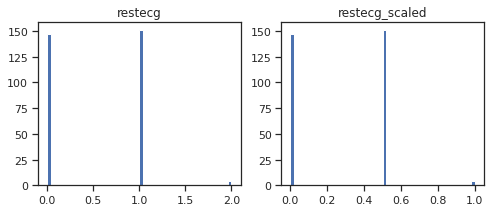

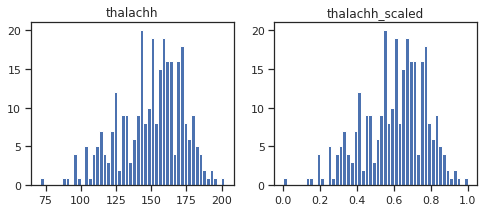

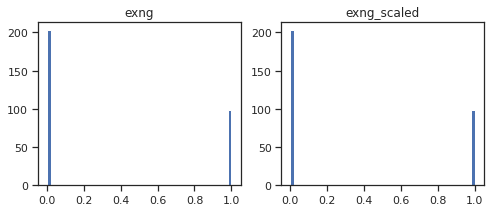

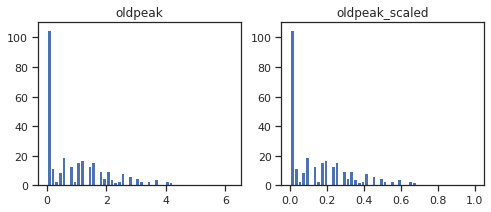

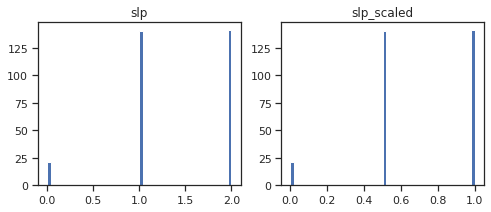

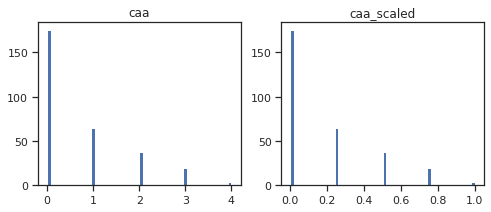

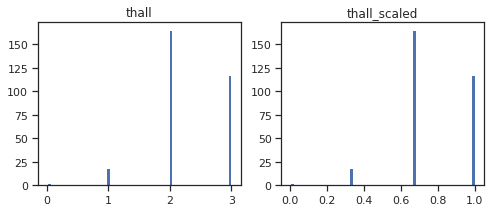

In [ ]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [ ]:
corr_cols_1 = scale_cols + ['output']
corr_cols_1

['age',
 'sex',
 'cp',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [ ]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['output']
corr_cols_2

['age_scaled',
 'sex_scaled',
 'cp_scaled',
 'chol_scaled',
 'fbs_scaled',
 'restecg_scaled',
 'thalachh_scaled',
 'exng_scaled',
 'oldpeak_scaled',
 'slp_scaled',
 'caa_scaled',
 'thall_scaled',
 'output']

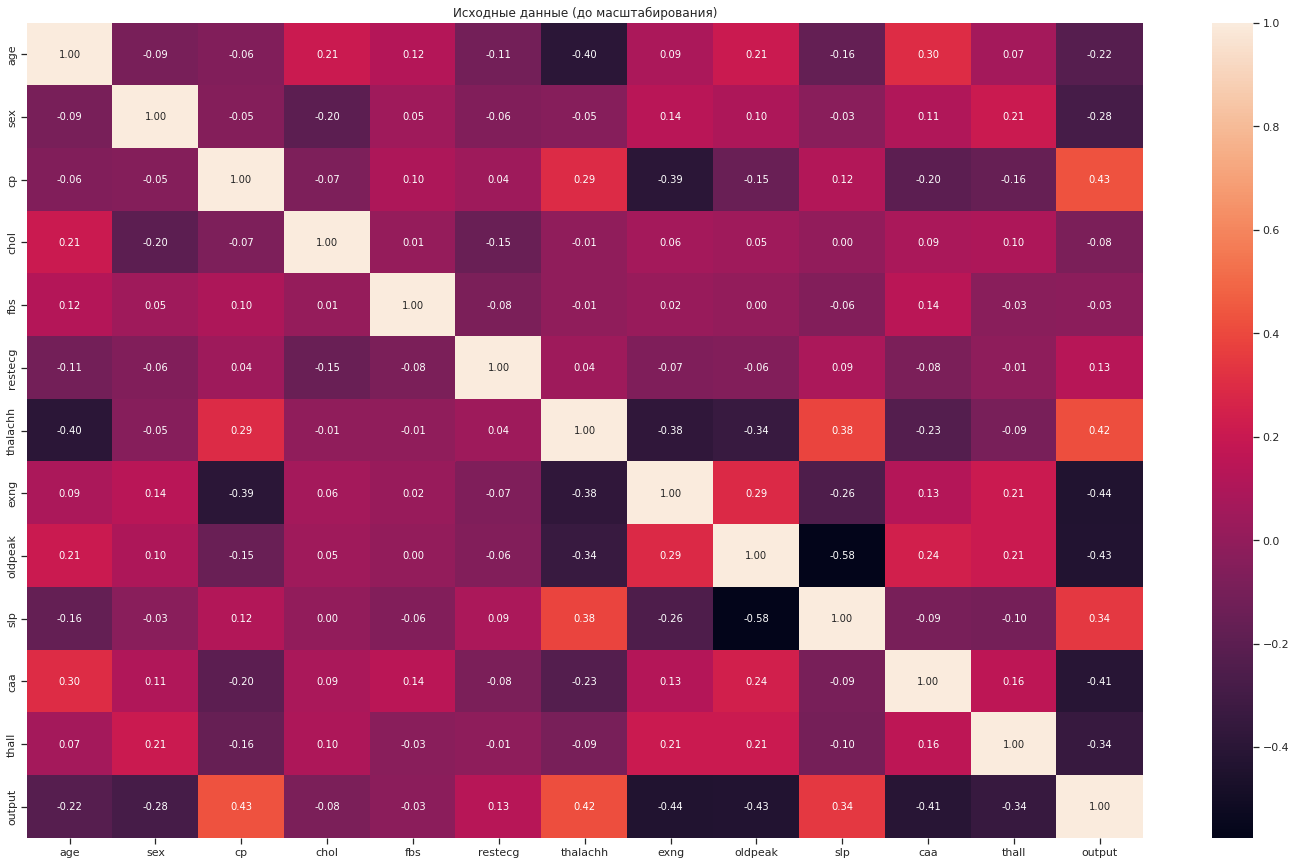

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

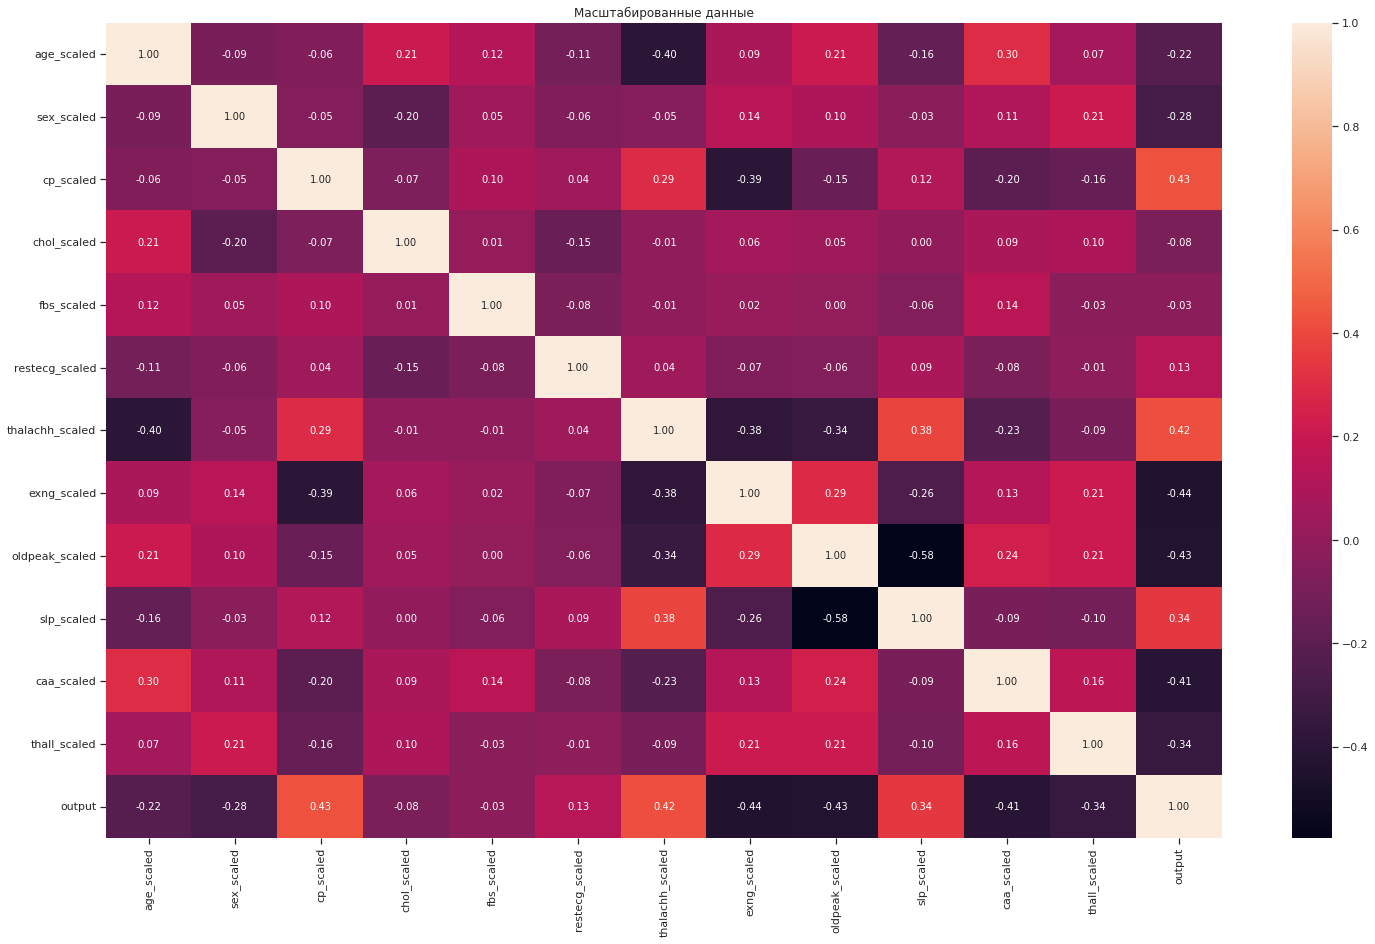

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

* Корреляционные матрицы для исходных и масштабированных данных совпадают.
* Целевой признак классификации "output" наиболее сильно коррелирует с типом боли в груди (0.43), с максимально достигнутым сердцебиением (0,42), со стенокардией, вызванной физ.нагрузкой (-0.44), предыдущий пик (-0.41), количеством крупных сосудов (-0.41). Остальные признаки очень слабо коррелируют с целевым признаком.
* Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.


## Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [ ]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data.output, random_state=1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((226, 26), (226,), (76, 26), (76,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

1. Логистическая регрессия

В отличие от обычной регрессии, в методе логистической регрессии не производится предсказание значения числовой переменной исходя из выборки исходных значений. Вместо этого, значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу. Для простоты, давайте предположим, что у нас есть только два класса. Таким образом, результат логистической регрессии всегда находится в интервале [0, 1].

Основная идея логистической регрессии заключается в том, что пространство исходных значений может быть разделено линейной границей (т.е. прямой) на две соответствующих классам области. Итак, что же имеется ввиду под линейной границей? В случае двух измерений — это просто прямая линия без изгибов. В случае трех — плоскость, и так далее. Эта граница задается в зависимости от имеющихся исходных данных и обучающего алгоритма. Чтобы все работало, точки исходных данных должны разделяться линейной границей на две вышеупомянутых области. Если точки исходных данных удовлетворяют этому требованию, то их можно назвать линейно разделяемыми.

2. Градиентный бустинг — это техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений.

3. SVM

Основной задачей алгоритма является найти наиболее правильную линию, или гиперплоскость разделяющую данные на два класса. SVM это алгоритм, который получает на входе данные, и возвращает такую разделяющую линию.

Мы можем подобрать бесконечное множество таких линий, которые могут разделить эти два класса. Как же именно SVM находит “идеальную” линию, и что в его понимании “идеальная”?

Алгоритм SVM устроен таким образом, что он ищет точки на графике, которые расположены непосредственно к линии разделения ближе всего. Эти точки называются опорными векторами. Затем, алгоритм вычисляет расстояние между опорными векторами и разделяющей плоскостью. Это расстояние которое называется зазором. Основная цель алгоритма — максимизировать расстояние зазора. Лучшей гиперплоскостью считается такая гиперплоскость, для которой этот зазор является максимально большим.

4. Дерево решений

В обучающем множестве для примеров должно быть задано целевое значение, так как деревья решений — модели, создаваемые на основе обучения с учителем. По типу переменной выделяют два типа деревьев:

* дерево классификации — когда целевая переменная дискретная;
* дерево регрессии — когда целевая переменная непрерывная.

Дерево решений — метод представления решающих правил в определенной иерархии, включающей в себя элементы двух типов — узлов (node) и листьев (leaf). Узлы включают в себя решающие правила и производят проверку примеров на соответствие выбранного атрибута обучающего множества.

Далее к каждому подмножеству снова применяется правило, процедура повторяется. Это продолжается, пока не будет достигнуто условие остановки алгоритма. Последний узел, когда не осуществляется проверка и разбиение, становится листом.

Лист определяет решение для каждого попавшего в него примера. Для дерева классификации — это класс, ассоциируемый с узлом, а для дерева регрессии — соответствующий листу модальный интервал целевой переменной. В листе содержится не правило, а подмножество объектов, удовлетворяющих всем правилам ветви, которая заканчивается этим листом.

Пример попадает в лист, если соответствует всем правилам на пути к нему. К каждому листу есть только один путь. Таким образом, пример может попасть только в один лист, что обеспечивает единственность решения.

5. RF (random forest) — это множество решающих деревьев. В задаче регрессии их ответы усредняются, в задаче классификации принимается решение голосованием по большинству. Все деревья строятся независимо по следующей схеме:

Выбирается подвыборка обучающей выборки размера samplesize (м.б. с возвращением) – по ней строится дерево (для каждого дерева — своя подвыборка).
Для построения каждого расщепления в дереве просматриваем max_features случайных признаков (для каждого нового расщепления — свои случайные признаки).
Выбираем наилучшие признак и расщепление по нему (по заранее заданному критерию). Дерево строится, как правило, до исчерпания выборки (пока в листьях не останутся представители только одного класса), но в современных реализациях есть параметры, которые ограничивают высоту дерева, число объектов в листьях и число объектов в подвыборке, при котором проводится расщепление.

6. kNN (k-Nearest Neighbors) – это алгоритм классификации, однако это – ленивый классификатор.

Что значит ленивый классификатор? Это означает, что в процессе обучения он не делает ничего, а только хранит тренировочные данные. Он начинает классификацию только тогда, когда появляются новые немаркированные данные.

Активный же классификатор создает классификационную модель в процессе обучения. Когда вводятся новые данные, такой классификатор «скармливает» данные классификационной модели.

Когда появляется новые неразмеченные данные, kNN проходит по 2 базовым шагам:

Сначала он ищет k ближайших размеченных точек данных – другими словами, k ближайших соседей.

Затем, используя классы соседей, kNN решает, как лучше классифицировать новые данные.

Как kNN понимает, какие точки находятся ближе всего? Для непрерывных данных kNN использует дистанционную метрику, например, Евклидову дистанцию (метрику). Выбор метрики зависит от типа данных. Некоторые советуют даже выбирать дистанционную метрику на основании тренировочных данных.

Как kNN решает, к какому классу отнести данные, если соседи не принадлежат одному классу?

Для решения этой проблемы используются 2 классические техники:

* Принять за правильное решение простое большинство. К какому классу относится наиболее количество соседей, туда и определяют точку данных.
* Проделать то же самое, но дать ближайшим соседям больший вес. Самый простой способ сделать это – использовать квантиль расстояния. Если сосед отстоит на 5 единиц, то его вес будет 1/5. При увеличении дистанции вес становится все меньше и меньше. Это как раз то, что нам нужно.

In [ ]:
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [ ]:
clasMetricLogger = MetricLogger()

In [ ]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [ ]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train, y_train)
    # Предсказание значений
    Y_pred = model.predict(X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(y_test.values, Y_pred)
    recall = recall_score(y_test.values, Y_pred)
    f1 = f1_score(y_test.values, Y_pred)
    roc_auc = roc_auc_score(y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, X_test, y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

ROC-кривая и ROC AUC используется для оценки качества бинарной классификации.

Основана на вычислении следующих характеристик:

TPR=TP/(TP+FN) - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

FPR=FP/(FP+TN) - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


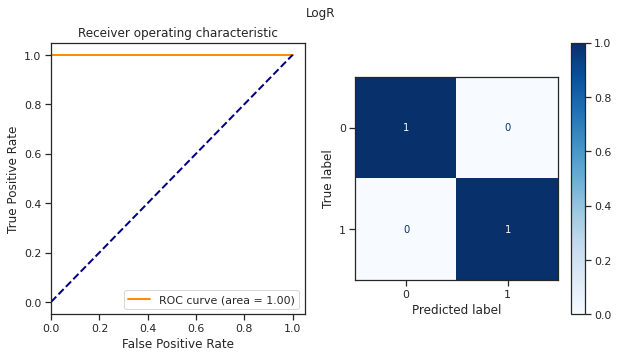

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


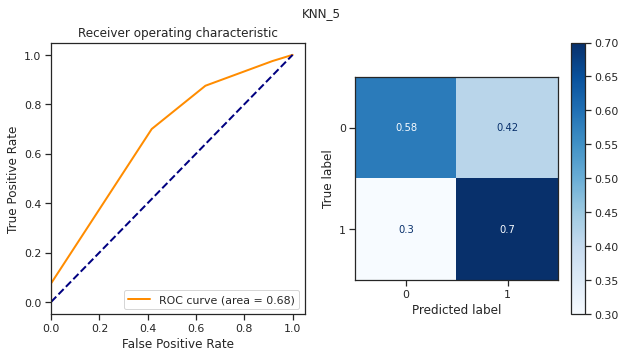

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


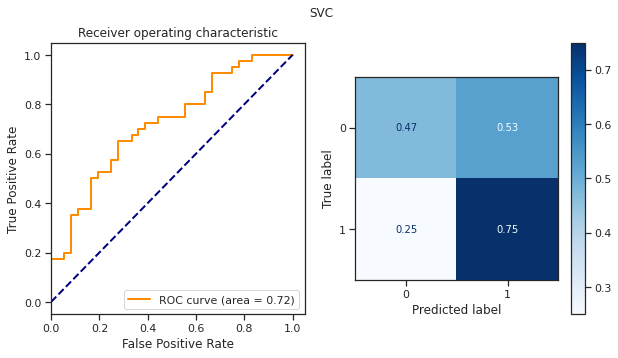

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


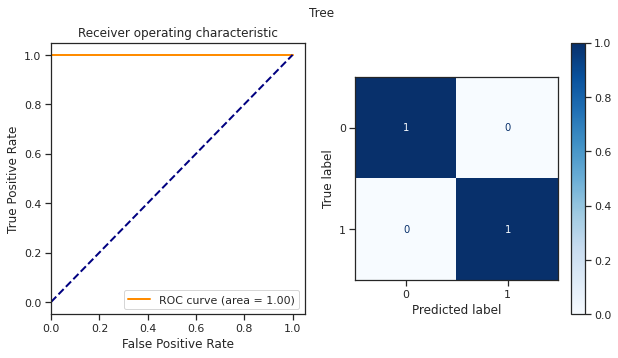

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


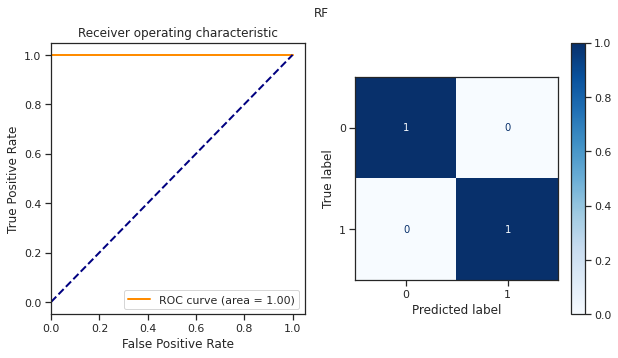

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


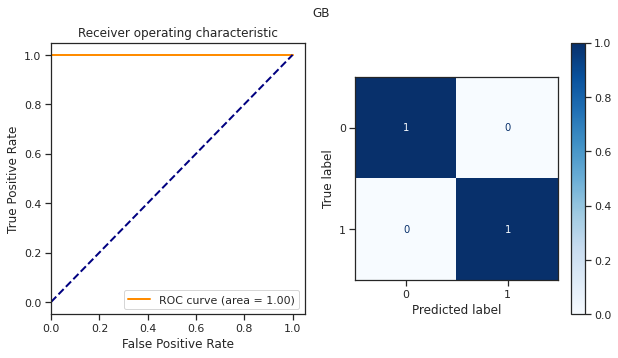

In [ ]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

В этом пункте мы будем подбирать оптимальное количество k соседей для лучшего качества классификации.

In [ ]:
X_train.shape

(226, 26)

Зададим, какие k в каком диапазоне и с каким шагом будем переьбирать:

In [ ]:
n_range_list = list(range(0,100,5))
n_range_list[0] = 1

In [ ]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
         85, 90, 95])}]

In [ ]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])}],
             scoring='roc_auc')

Узнаем, какой k лучший:

In [ ]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=70)

In [ ]:
clf_gs.best_params_

{'n_neighbors': 70}

In [ ]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'70'

Изменение качества на тестовой выборке в зависимости от К-соседей:

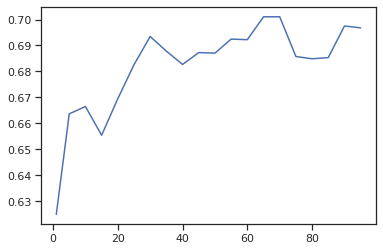

In [ ]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

Строим модель теперь с помощью k = 70, а не 5, как было ранее, и сравниваем их.

In [ ]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


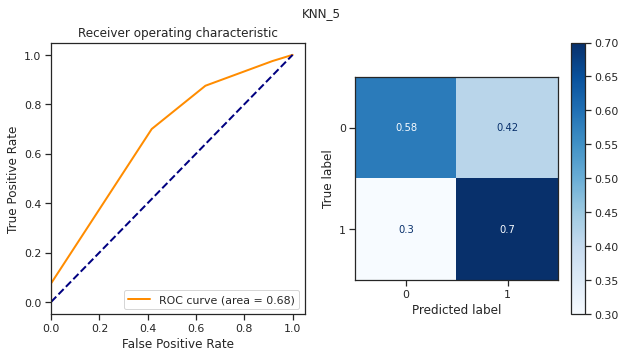

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


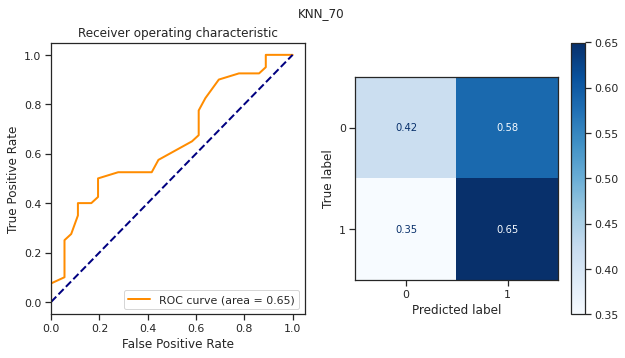

In [ ]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

Площадь ROC кривой при 70 соседях меньше, что, к сожалению, говорит об ухудшении качества моделей при оценке данных способом.

## Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

Немного про метрики:

**1.   Метрика precision:**

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Грубо говоря, можно определить как количество истинно положительных объектов на число истинно и ложно положительных.

precision=TP/(TP+FP)

**2.   Метрика recall (полнота):**

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

То есть, количество истинно положительных значений на количество всех положительных значений (всех подразумевает даже те, что с помощью классификации были ошибочно отнесены в ложные, хотя на самом деле являются положительными).

recall=TP/(TP+FN)

**3.  F-мера:**

Для того, чтобы объединить precision и recall в единую метрику используется Fβ-мера. На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при β=1

F1=2⋅precision⋅recall/(precision+recall)

**4.  ROC-кривая и ROC AUC**

Используется для оценки качества бинарной классификации.

Основана на вычислении следующих характеристик:

TPR=TP/(TP+FN) - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

FPR=FP/(FP+TN) - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

In [ ]:
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

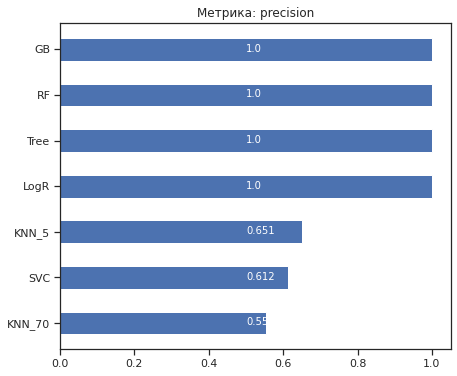

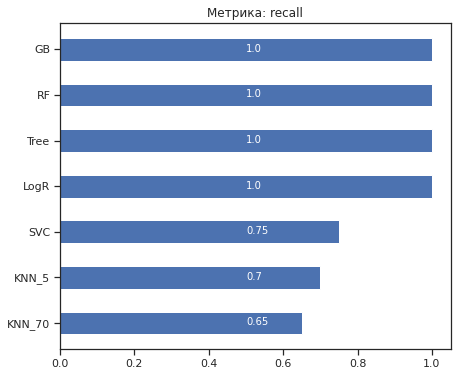

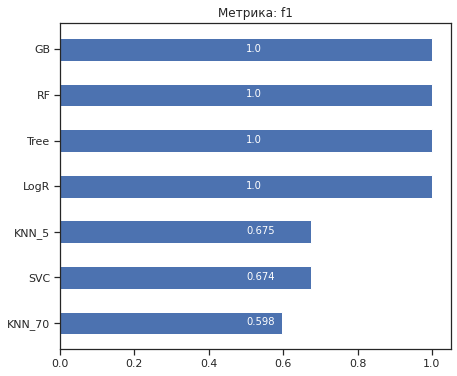

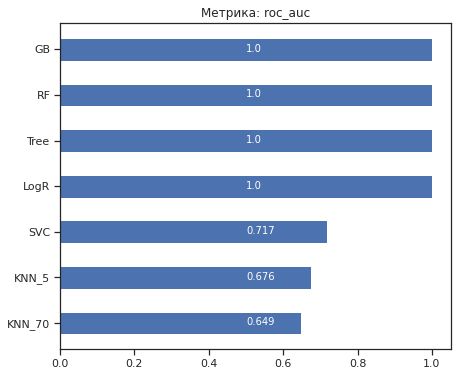

In [ ]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

Вывод: наилучшие модели построены методами градиентного бустинга, деревьев решений, случайного леса и логистической регрессии.

## Заключение

Были выявлены критерии, сопутствующие риску возникновению инсульта: 

* тип боли в груди; 
* максимально достигнутое сердцебиение.

Уменьшают риск инсульта следующие факторы:

* стенокардия, вызванной физ.нагрузкой
* предыдущий пик
* количеством крупных сосудов.

Остальные признаки очень слабо коррелируют с риском развития инсульта.

Также была достигнута цель данной работы - применены логистическая регрессия, метод k ближайших соседей, деревья решений, градиентный бустинг, случайный лес и SVM-алгоритм для предсказания значений целевого признака в модели.

Также мы подбирали гиперпараметр - k в методе k ближайших соседей, чтобы улучшить построенную нами модель.

В итоге, используя методы оценки precision, recall, F-мера, а также ROC-кривая и ROC AUC, было выявлено, что наилучшие модели построены методами градиентного бустинга, деревьев решений, случайного леса и логистической регрессии.